In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

>- 📌 Since data is in the form of **excel file(.xls)** we have to use **pd.read_excel()** to load the data.

In [2]:
train_data = pd.read_excel(r'Data_Train.xlsx')
# to make pandas to display all the columns in dataset:
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


> Get all informations about our data.

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# display this data point that has NaN value:
train_data[train_data.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
# Since we have a sufficient amount of data,
# it's acceptable  to drop this single data_point

train_data.dropna(inplace=True)
# check
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 1️⃣ Train Set
## ⭕ EDA
>As we can see the **`Date_of_Journey`** is represented as object dtype, so we have to convert it to a timestamps to use this column in prediction:

>- we require `pd.to_datetime` to convert object dtype to datetime dtype.
- `.dt.day` method extracts only day of that date.
- `.dt.month` method extracts only month of that date.
 
Good Source : [Python Date Format Codes](https://www.w3schools.com/python/gloss_python_date_format_codes.asp)

In [7]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

# since we've converted `Date_of_Journey` col into integers,
# now, we can drop it as it's useless.

train_data.drop(['Date_of_Journey'] ,axis=1 , inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### ✅ Departure time.

In [8]:
# Departure time is the time when a plane leaves the airport.
# we extract the `hour` & `min` as we did with the date.
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# Now we can drop Dep_Time as it's useless.
train_data.drop(['Dep_Time'] , axis=1 , inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### ✅ Arrival time.

In [9]:
# Arrival time is when the plane reaches destination's airport.
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# drop the original column:
train_data.drop(['Arrival_Time'] , axis=1 ,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### ✅ Duration.

In [10]:
duration = list(train_data['Duration'])
duration[:10]

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m']

In [11]:
# Duration is the time taken by the plane to reach destination.
# it's the difference between Departure Time & Arrival time.

for i in range(len(duration)):
    # check if the duration contains only hour or mins.
    if len(duration[i].split()) != 2:
        # since it has only hours add 0 mins 
        if 'h' in duration[i] : 
            duration[i] = duration[i].strip() +' 0m'
        else:
            duration[i] = '0h '+ duration[i].strip()
            
print(duration[:10])    

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m']


In [12]:
# My thought process
print(duration[0],'\n')

print(duration[0].split('h'))
print('--->',duration[0].split('h')[0],'\n')

print(duration[0].split('m'))
print('--->',duration[0].split('m')[0].split()[-1])

2h 50m 

['2', ' 50m']
---> 2 

['2h 50', '']
---> 50


In [13]:
# excution:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))
    
#check:
print(duration_hours[:10])

# add these 2 lists as a 2 cols in train_data:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

train_data.drop(['Duration'], axis =1 , inplace=True)
train_data.head()

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7]


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## ⭕ Handling Categorical Data.
>There are 2 ways to handle this issue:
1. **Nominal Data** : data aren't in order ⏩ **OneHotEncoder**.
2. **Ordinal Data** : data are in order ⏩ **LableEncoder**.

### ✅ Airline.

In [14]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

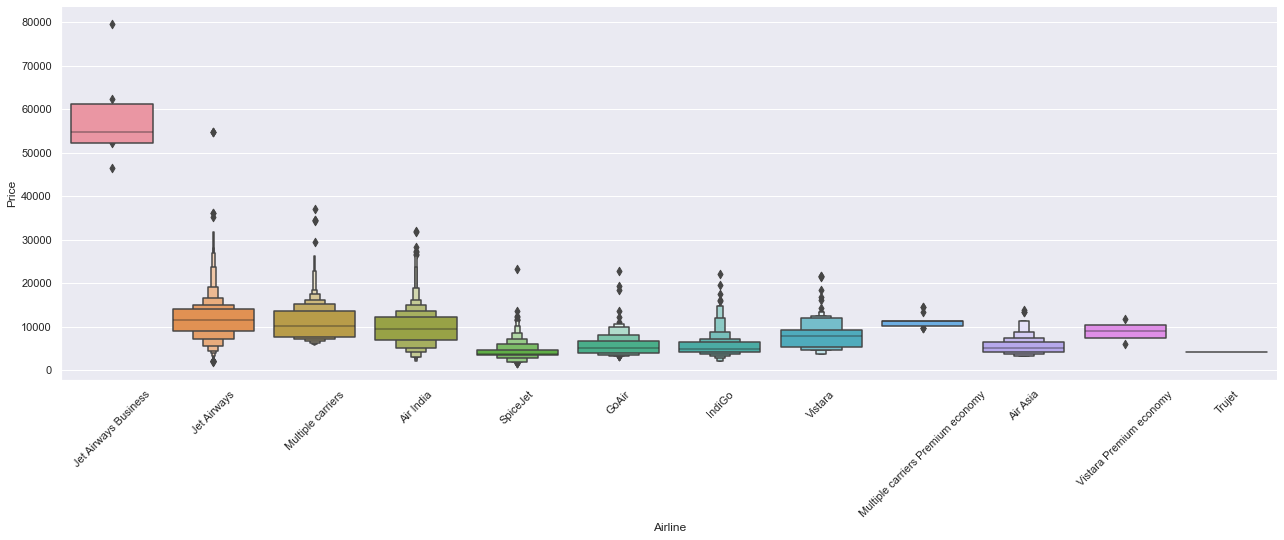

In [15]:
# Discovering the relation between `Airline` & `Price`
# using catplot:

# Airline vs Price
sns.catplot(x='Airline' , y='Price' , data = train_data.sort_values('Price', ascending=False),
            kind='boxen' , height=6, aspect=3)
plt.xticks(rotation=45)
plt.show()

In [16]:
# since Airline is Nominal categorical data we'll
# perform OneHotEncoding.

# drop_first: Whether or not to drop the first dummy
# variable column which its values is all 0 or all 1.
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### ✅ Source.

In [17]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

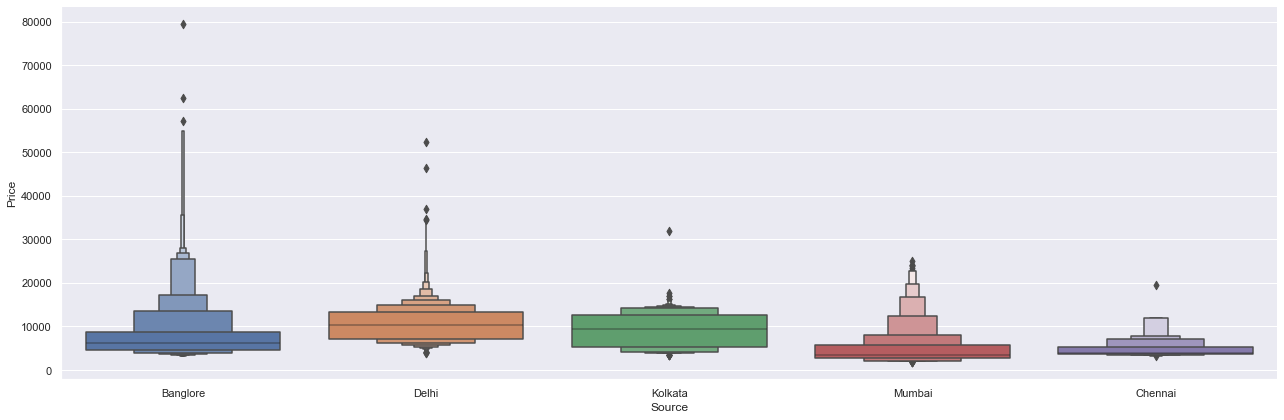

In [18]:
# Source vs. Price
sns.catplot(y= 'Price' , x='Source',data=train_data.sort_values('Price',ascending=False)
            ,kind='boxen',height=6 , aspect=3);

In [19]:
# As Source is Nominal Categorical data we will
# perform OneHotEncoding.
Source = train_data[['Source']]
Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### ✅Destination.

In [20]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

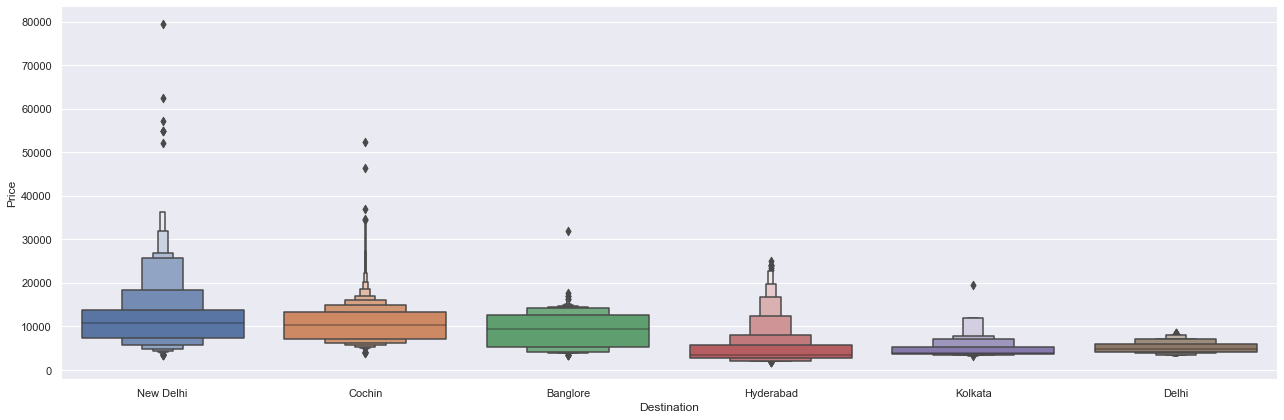

In [21]:
# Destination vs. Price
sns.catplot(y= 'Price' , x='Destination',data=train_data.sort_values('Price',ascending=False)
            ,kind='boxen',height=6 , aspect=3);

In [22]:
# As Destination is Nominal Categorical data we will
# perform OneHotEncoding.

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


- **train_data.Destination** ⏩ gives `pd.Series`
- **train_data[['Destination']]** ⏩ gives `pd.DataFrame`

### ✅Route , Additional_Info & Total_Stops.
**Route & Total_Stops are intercorrelated columns so we need to remove one of each.Just make one of them represnt this feature which is `Total_Stops`.**

- let's examine `Additional_Info` col.

In [23]:
# what does `Additional_Info` add? almost Nothing.
# so we're gonna drop it.
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
# drop Additional_Info & Total_Stops.
train_data.drop(['Additional_Info' , 'Route'],axis=1,
                inplace=True)

In [25]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({'non-stop':0,'1 stop':1 ,"2 stops": 2,
                    "3 stops": 3, "4 stops": 4} ,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### ⭕ Concatenate dataframes : train_data + Airline + Source +Destination
>Drop the useless columns.This would be **The final train_data version** 

In [27]:
train_data = pd.concat([train_data , Airline , Source , Destination], axis=1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# drop `Airline` , `Source` & `Destination` columns as they provide nothing.
train_data.drop(['Airline','Source','Destination'],axis=1 , inplace=True)
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 2️⃣ Test Set
Do all the adjustments we did on the Train Set to the Test set to be compatible with each other in the model.

In [29]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [30]:
# preprocessing
print('Test data Info')
print("-"*75)
print(test_data.info())
print('\n\n')

print('Null Values :')
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# EDA
# 1. Date_of_Journey
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'] , format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

# 2. Departure Time
test_data['Dep_hour']= pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)

# 3. Arrival Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'] , axis=1 , inplace=True)

# 4. Duration
duration = list(test_data['Duration'])
# we want to know if a single duration consists from only mins or hours To 0 in the other attribute
for i in range(len(duration)):
    if len(duration[i].split()) !=2 :
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() +' 0m'
        else:
            duration[i] = '0h ' + duration[i].strip()
# check....
print('\nDuration')
print('-'*75)
print(duration[:5])

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

# check....
print(duration_hours[:5])
print(duration_mins[:5])
# Remove the Original column & assign the 2 lists into the df.
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins
test_data.drop(['Duration'] , axis=1 , inplace=True)


# Handling Categorical features:
# 1. Airline  --> OneHotEncoder
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

# 2. Source  --> OneHotEncoder
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

# 3. Destination  --> OneHotEncoder
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

# 4. Total_Stops --> LabelEncoder
test_data.replace({'non-stop':0 , '1 stop':1 , '2 stop':2 , '3 stop':3 , '4 stop':4}, inplace= True)

# 5. concatenate --> test_data + Airline + Source +Destination
# drop the original columns & the unprofitable columns.
test_data = pd.concat([test_data , Airline , Source , Destination],axis=1)
test_data.drop(['Airline' , 'Source' , 'Destination'] , axis=1 , inplace= True)
test_data.drop(['Route' , 'Additional_Info'] , axis=1 , inplace= True)

print('\n')
print('Test_set shape -->',test_data.shape)
test_data.head(5)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None



Null Values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time        

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 3️⃣ Feature Selection.
Finding out the best features that will contribute the most in the model and have a good realation between our target variable . This could be done using 3 methods:
**(1) HeatMap**
**(2) feature_importance_**
**(3) SelectKBest**

In [31]:
print(train_data.shape)
train_data.head(2)

(10682, 30)


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
X = train_data.loc[:,train_data.columns !='Price']
y = train_data.iloc[:,1]

print(y.head(2))
X.head(2)

0    3897
1    7662
Name: Price, dtype: int64


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


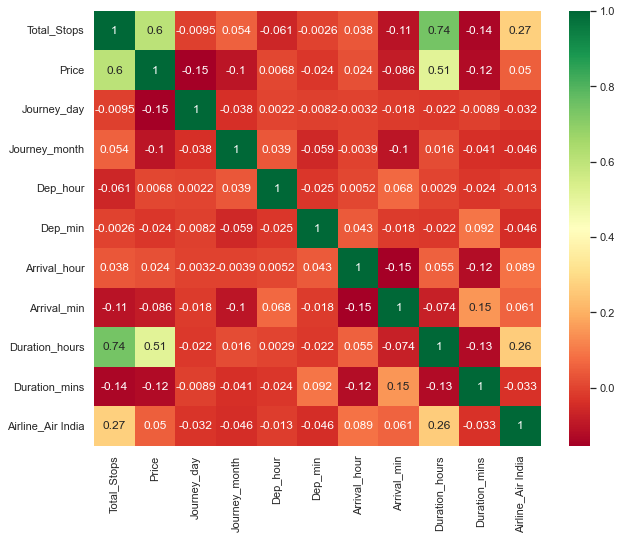

In [33]:
# (1) HeatMap : To see the correlation between the dependent variable and all other variables.
plt.figure(figsize=(10,8))
sns.heatmap(train_data.iloc[:,:11].corr(), annot = True , cmap = "RdYlGn")
plt.show()

- 📝 As the heatmap shows that `Total_stops` & `Duration_hours` have a remarkable relation between our target variable. 

[2.29277466e-01 1.44957750e-01 5.22681485e-02 2.46458228e-02
 2.07478056e-02 2.71156803e-02 1.95169288e-02 1.14699381e-01
 1.75024715e-02 9.70862452e-03 1.77835428e-03 1.70879676e-02
 1.44622997e-01 6.74612543e-02 2.06363561e-02 8.76375207e-04
 2.49875109e-03 1.00124133e-04 5.22022418e-03 8.85125876e-05
 4.79124438e-04 1.03525629e-02 3.10197902e-03 6.54459545e-03
 9.89965313e-03 1.50745438e-02 8.00667574e-03 5.68567483e-04
 2.51613023e-02]
                              feature_imp
Total_Stops                      0.229277
Journey_day                      0.144958
Airline_Jet Airways              0.144623
Duration_hours                   0.114699
Airline_Jet Airways Business     0.067461


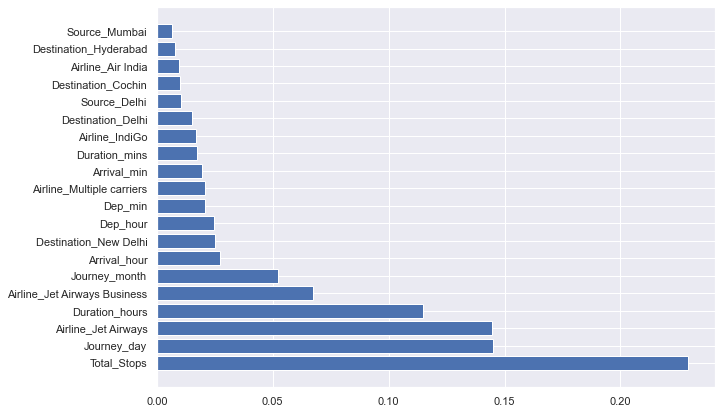

In [38]:
# (2) feature_importance_ using  ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor().fit(X,y)

print(selection.feature_importances_)
features_imp = pd.DataFrame(selection.feature_importances_, X.columns,['feature_imp']).sort_values('feature_imp',
                                                                                                   ascending=False)

print(features_imp.head())
plt.figure(figsize=(10,7))
plt.barh(features_imp.index[:20],features_imp['feature_imp'][:20])
plt.show()

## 4️⃣ Fitting the model using Random Forest Algorithm.
1. Split dataset into train & test set in order to predict w.r.t X_test
2. If needed perform scaling in the data:
    - `Random Forest Alg. doesn't need Scaling`.
    - source : [Do I need to normalize (or scale) data for randomForest?](https://stackoverflow.com/questions/8961586/do-i-need-to-normalize-or-scale-data-for-randomforest-r-package#:~:text=Random%20Forest%20is%20a%20tree-based%20model%20and%20hence,then%20also%3E%20the%20result%20would%20be%20the%20same.)
3. Import the model.
4. Fit the data.
5. Predict w.r.t X_test.
6. In regression check **RMSE** score for Evalution.
7. plot the graph.

The Model Eff. on the Train Data : 0.9532508636557258
The Model Eff. on the Test Data : 0.7989477828437459

MAE : 1173.4425447073854
MSE : 4335099.230420756
RMSE : 2082.090111023237
RMSE/(max(DV)-min(DV) : 0.02689709721811377
R2 score : 0.7989477828437459


C:\Users\Assem Salama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


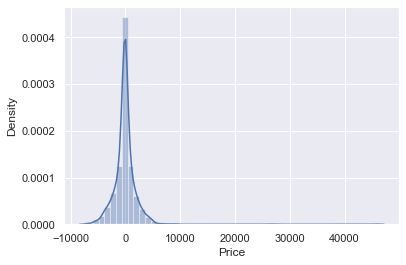

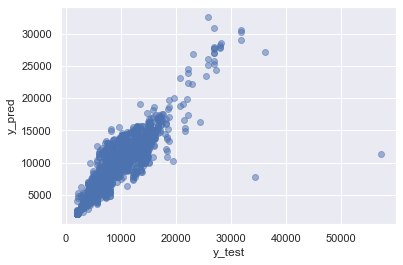

In [57]:
# 1:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train ,X_test , y_train , y_test =train_test_split(X,y ,test_size=0.2,random_state=42)

# 3,4:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(X_train,y_train)

# 5:
y_pred = rf_reg.predict(X_test)

# 6: 
print('The Model Eff. on the Train Data :' ,rf_reg.score(X_train , y_train))
print('The Model Eff. on the Test Data :' ,rf_reg.score(X_test , y_test))
print('\nMAE :',metrics.mean_absolute_error(y_test ,y_pred))
print('MSE :',metrics.mean_squared_error(y_test ,y_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test ,y_pred)))
print('RMSE/(max(DV)-min(DV) :' , 2091.33/(max(y)-min(y)))
print('R2 score :',metrics.r2_score(y_test ,y_pred))

# 7:
sns.distplot(y_test - y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5️⃣Hyper Parameter Tuning.
1. Choose one of the following methods for hyper parameter tuning:
    - RandomizedSearchCV ----> Fast
    - GridSearchCV
    - source :[GridSearchCV & RandomizedSearchCV](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)
2. Assign hyper parameters in form of dictionary.
3. Fit the model.
4. Check best parameters and best score.

In [58]:
# 1 :
from sklearn.model_selection import RandomizedSearchCV

# 2 : 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# 3 :
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)
rf_random.fit(X_train,y_train)

# 4 :
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   6.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}


MAE : 1139.0322531445374
MSE : 4055465.5861194218
RMSE : 2013.8186577046658
R2 score : 0.8119165665301138


C:\Users\Assem Salama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


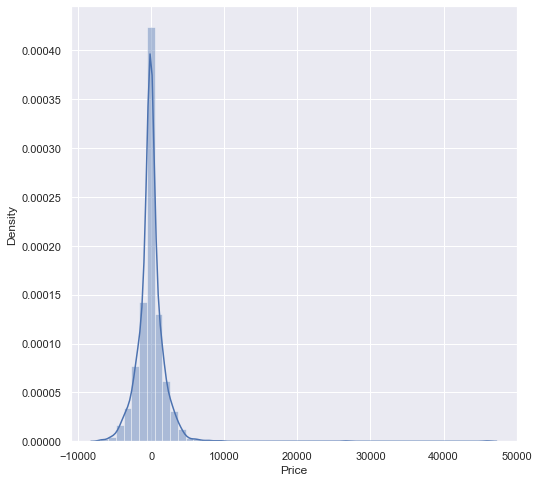

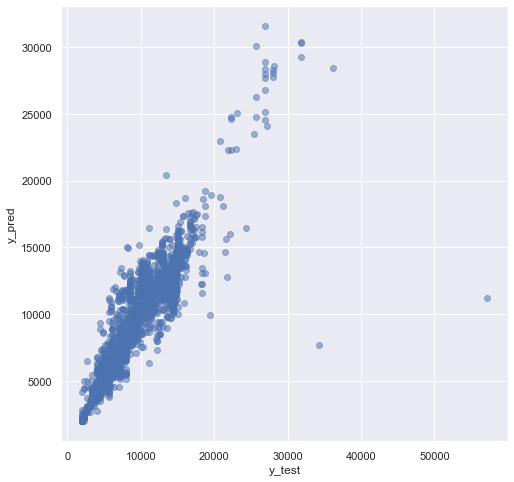

In [60]:
# 5 :
prediction = rf_random.predict(X_test)

# 6 : 
print('\nMAE :',metrics.mean_absolute_error(y_test ,prediction))
print('MSE :',metrics.mean_squared_error(y_test ,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test ,prediction)))
print('R2 score :',metrics.r2_score(y_test ,prediction))

# 7 : 
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 6️⃣Save the model to reuse it again.

In [61]:
import pickle 
# open a file where you want to store the data.
file = open('flight_rf.pkl','wb')
# dump the final tweecked model to that file.
pickle.dump(rf_random , file)

model = open('flight_rf.pkl' , 'rb')
forest = pickle.load(model)

# use it & make sure it gives the same r2_score as we got above.
y_prediction = forest.predict(X_test)
print('R2 score :',metrics.r2_score(y_test ,y_prediction))

R2 score : 0.8119165665301138
